# Controle de validade dos produtos

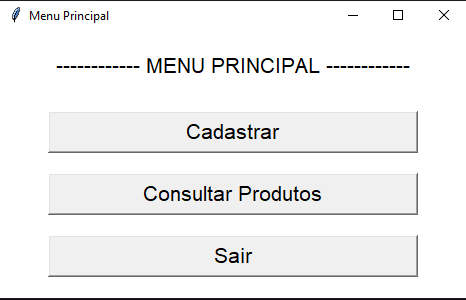

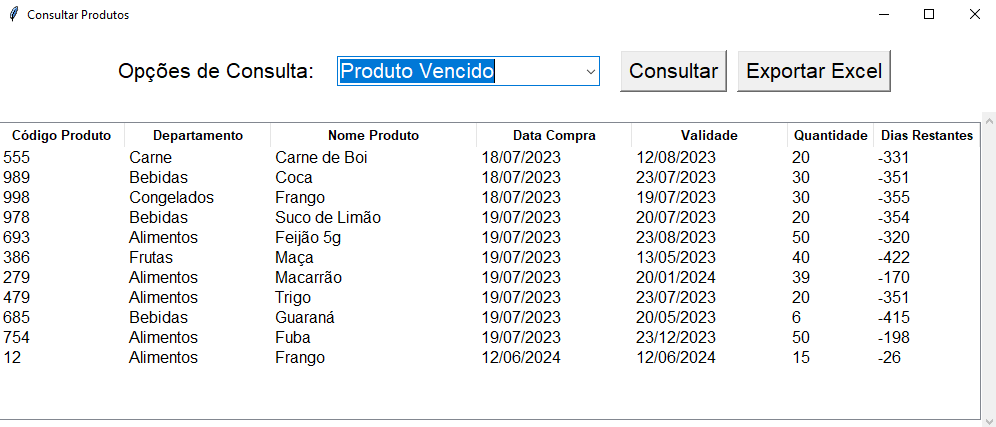

In [3]:
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from datetime import datetime
from tkinter import *
import pandas as pd
# import xlsxwriter
from tkinter import filedialog


def centralizar_janela(tela,largura,altura):
    x,y = largura,altura
    tela.geometry("{}x{}+{}+{}".format(x,y,
                                        int((tela.winfo_screenwidth() / 2) - (x / 2)),
                                        int((tela.winfo_screenheight() / 2) - (y / 2))))

#Lista de produtos
produtos = []
janela_principal = tk.Tk()
janela_principal.title('Menu Principal')
centralizar_janela(janela_principal,500,350)

# Definir a cor de fundo da janela
janela_principal.configure(bg="#FFFFFF")

#Criar os elementos da interface do menu principal
label_menu_principal = tk.Label(janela_principal,
                               text="------------ MENU PRINCIPAL ------------",
                               bg="#FFFFFF",
                               font=("Arial 16"))
label_menu_principal.pack(pady = 20)

def cadastrar_produto(entry_codigo,entry_nome,entry_derpatamento, entry_data_compra,entry_data_validade,entry_quantidade):
    
    #Obtem os valores inseridos nos campos de entrada
    codigo = entry_codigo.get()
    nome = entry_nome.get()
    departamento = entry_derpatamento.get()
    data_compra = entry_data_compra.get()
    data_validade = entry_data_validade.get()
    quantidade = entry_quantidade.get()

    try:
        
        # # Converter a string da data de validade para o formato de data
        # data_validade = datetime.strptime(data_validade, "%d/%m/%Y").date()

        #Converter as strings das datas para o formato de data
        data_compra = pd.to_datetime(data_compra, format="%d/%m/%Y").strftime('%d/%m/%Y')
        data_validade = pd.to_datetime(data_validade, format="%d/%m/%Y").strftime('%d/%m/%Y')
    
    except ValueError:
        
        messagebox.showerror("Erro", "Formato de data inválido. Use o formato dd/mm/aaaa.")
        
    #Criando um DataFrame com os dados do produto
    produto = {        
        "Código Produto" : codigo,
        "Depatamento" : departamento,
        "Nome Produto" : nome,
        "Data Compra" : data_compra,
        "Validade" : data_validade,
        "Quantidade" : quantidade
    }
    
    df = pd.DataFrame([produto])
    excel_file_path = "Dados.xlsx"

    #Verifica se o arquivo de Excel existe
    try:
        
        excel_data = pd.read_excel(excel_file_path)
        
        #Concatenar o novo produto do DataFrame existente
        df = pd.concat([excel_data, df], ignore_index=True)
        
    except FileNotFoundError:
        
        pass

    #-----------------------------------------------------------------------------------

    # pd.ExcelWriter() do pandas para criar um objeto de escrita para o arquivo Excel especificado
    with pd.ExcelWriter(excel_file_path,
                        engine="openpyxl",#Especifica o mecanismo a ser usado para escrever no arquivo 'openpyxl' ler Excel
                       
                        mode="a",#Modo de adiciona os dados no final

                        # f_sheet_exists="replace": Se a planilha "Produtos" 
                        # já existir no arquivo substitua pelo novo conjundo de dados
                        if_sheet_exists="replace") as arquivo:
        df.to_excel(arquivo, 
                    # sheet_name = Onde os dados serão escritos na (ABAS - Produtos)
                    sheet_name="Produtos", 
                    index=False)

    # Exibir uma mensagem de sucesso
    messagebox.showinfo("Sucesso", "Produto cadastrado com sucesso!")
    janela_cadastro.destroy()

def abrir_tela_cadastro():

    global janela_cadastro
    
    janela_cadastro = tk.Toplevel()
    janela_cadastro.grab_set() # priorisa sua exibicao

    centralizar_janela(janela_cadastro,600,400)
    janela_cadastro.rowconfigure([0,1,2,3,4,5,6],weight=1)
    # Definir a cor de fundo da janela
    janela_cadastro.configure(bg="#FFFFFF")
    
    #Criar os elementos da interface de cadastro
    #sticky="e" - Alinhar na direita
    label_codigo = tk.Label(janela_cadastro,
                           text = "Código Produto:",
                           bg="#FFFFFF",
                           font="Arial 16")
    label_codigo.grid(row = 0, column = 0, padx = 10, pady = 10, sticky="e")
    
    #Campo de entrada de dados
    entry_codigo = tk.Entry(janela_cadastro,
                           font="Arial 16")
    entry_codigo.grid(row = 0, column = 1, padx = 10, pady = 10)
    
    #------------------------------------------------------
    
    label_derpatamento = tk.Label(janela_cadastro,
                           text = "Departamento:",
                           bg="#FFFFFF",
                           font="Arial 16")
    label_derpatamento.grid(row = 1, column = 0, padx = 10, pady = 10, sticky="e")
    
    #Campo de entrada de dados
    entry_derpatamento = tk.Entry(janela_cadastro,
                           font="Arial 16")
    entry_derpatamento.grid(row = 1, column = 1, padx = 10, pady = 10)
    
    #------------------------------------------------------
      
    label_nome = tk.Label(janela_cadastro,
                           text = "Nome Produto:",
                           bg="#FFFFFF",
                           font="Arial 16")
    label_nome.grid(row = 2, column = 0, padx = 10, pady = 10, sticky="e")
    
    #Campo de entrada de dados
    entry_nome = tk.Entry(janela_cadastro,
                           font="Arial 16")
    entry_nome.grid(row = 2, column = 1, padx = 10, pady = 10)


    #------------------------------------------------------
    label_data_compra = tk.Label(janela_cadastro,
                           text = "Date de Validade (dd/mm/aaaa):",
                           bg="#FFFFFF",
                           font="Arial 16")
    label_data_compra.grid(row = 3, column = 0, padx = 10, pady = 10, sticky="e")
    
    #Campo de entrada de dados
    entry_data_compra = tk.Entry(janela_cadastro,
                           font="Arial 16")
    entry_data_compra.grid(row = 3, column = 1, padx = 10, pady = 10)

    #------------------------------------------------------

    label_data_validade = tk.Label(janela_cadastro,
                           text = "Date de Validade (dd/mm/aaaa):",
                           bg="#FFFFFF",
                           font="Arial 16")
    label_data_validade.grid(row = 4, column = 0, padx = 10, pady = 10, sticky="e")
    
    #Campo de entrada de dados
    entry_data_validade = tk.Entry(janela_cadastro,
                           font="Arial 16")
    entry_data_validade.grid(row = 4, column = 1, padx = 10, pady = 10)

    #------------------------------------------------------

    
    label_quantidade = tk.Label(janela_cadastro,
                           text = "Quantidade:",
                           bg="#FFFFFF",
                           font="Arial 16")
    label_quantidade.grid(row = 5, column = 0, padx = 10, pady = 10, sticky="e")
    
    #Campo de entrada de dados
    entry_quantidade = tk.Entry(janela_cadastro,
                           font="Arial 16")
    entry_quantidade.grid(row = 5, column = 1, padx = 10, pady = 10)

    #------------------------------------------------------
    
     #Campo de entrada de dados
    botao_cadastrar_produto = tk.Button(janela_cadastro,
                           font="Arial 16",
                           text="Cadastrar",
    # Para passar variaveis de uma funcao para outra preciso usar essa expressao
    command = lambda : cadastrar_produto(entry_codigo,entry_nome,entry_derpatamento, entry_data_compra,entry_data_validade,entry_quantidade))
    
    botao_cadastrar_produto.grid(row = 6, column = 0, columnspan = 2, padx = 10, pady = 10, sticky="NSEW")


#Criando os botões na tela
botao_cadastrar = tk.Button(janela_principal,
                               text="Cadastrar",
                               font=("Arial 16"),
                               command = abrir_tela_cadastro,
                               width = 30)
botao_cadastrar.pack(pady = 10)




def consultar_produtos(combo_opcoes, treeview_resultado): 
    #Obtem a opção selecionada
        opcao = combo_opcoes.get()

        if opcao == "Tranquilo":

            dias_min = 91 
            dias_max = float('inf') #inf - Numero infinito positivo

        elif opcao == "Alerta":

            dias_min = 31 
            dias_max = 90 
            
        elif opcao == "Critico":

            dias_min = 1
            dias_max = 30
            
        elif opcao == "Produto Vencido":

            dias_min = float('-inf')
            dias_max = 0
        
        # Obtém a data atual
        data_atual = datetime.now()
        

            #Verifica se o arquivo de Excel existe
        try:
            
            excel_data = pd.read_excel('Dados.xlsx',sheet_name='Produtos')
            
                        
        except FileNotFoundError:
            messagebox.showerror('Error','Arquivo de dados não encontrado.')
            return

        # Converte a coluna 'Validade' para o tipo dt.date
        excel_data['Validade'] = pd.to_datetime(excel_data['Validade'], format="%d/%m/%Y", errors='coerce')
        
        
        # Filtrando os produtos com base nas opçoes selecionadas
        # Filtra entre uma data e outra com between( data1_Minima , data2_Maxima)
        produtos_filtrados = excel_data.loc[(excel_data['Validade'] - data_atual).dt.days.between(dias_min,dias_max)]
        
       
        #Limpa as linhas existentes na treeview_resultado
        treeview_resultado.delete(*treeview_resultado.get_children())

        for _, produto in produtos_filtrados.iterrows():
            
            
            dias_restantes = produto["Validade"] - data_atual
            #Adiciona uma linha na treeview
            treeview_resultado.insert("", tk.END, values = (produto["Código Produto"], 
                                                         produto["Depatamento"], 
                                                         produto["Nome Produto"], 
                                                         datetime.strptime(produto["Data Compra"], "%d/%m/%Y").date().strftime("%d/%m/%Y"), 
                                                         produto["Validade"].strftime("%d/%m/%Y"), 
                                                         produto["Quantidade"], 
                                                         dias_restantes.days))
            

              

        

def abrir_tela_consulta():
     #Criar a janela secundária
    janela_consulta = tk.Toplevel()
    janela_consulta.grab_set() # priorisa sua exibicao
    janela_consulta.title("Consultar Produtos")
    
    centralizar_janela(janela_consulta,1000,400)
    
    # Definir a cor de fundo da janela
    janela_consulta.configure(bg="#FFFFFF")
    
    #Cria um frame para agrupar os elementos pode dizer que é uma DIV
    frame_topo = tk.Frame(janela_consulta, bg="#FFFFFF")
    frame_topo.pack(pady=10)
    
    #Criar os elementos da interface de cadastro
    #sticky="e" - Alinhar na direita
    label_opcoes = tk.Label(frame_topo,
                           text = "Opções de Consulta:",
                           bg="#FFFFFF",
                           font="Arial 16")
    label_opcoes.pack(side = tk.LEFT, padx=10)
    
    
    #Cria a combobox para as opções de consulta-------------------------------------
    combo_opcoes = ttk.Combobox(frame_topo, 
                               values=["Tranquilo", "Alerta", "Critico", "Produto Vencido"],
                               font="Arial 16")
    combo_opcoes.pack(side = tk.LEFT, padx=10)
    
    
    #Cria o botão para consultar -------------------------------------
    botao_consultar_produto = tk.Button(frame_topo, 
                               text = "Consultar",
                               font="Arial 16",
                               command = lambda: consultar_produtos(combo_opcoes, treeview_resultado))
    botao_consultar_produto.pack(side = tk.LEFT, padx=10)

    #Cria o botão para exportar-------------------------------------
    botao_exportar = tk.Button(frame_topo,
                                text="Exportar Excel",
                                font=("Arial 16"),
                                command = lambda :exportar_excel(treeview_resultado))
    botao_exportar.pack(pady = 10,side = tk.LEFT)

    # Exibir dados ---------------------------------------------------------------
    #Cria a treeview para exibir os resultados


    colunas = {"Código Produto":120, "Departamento":140,"Nome Produto":200,
    "Data Compra":150,"Validade":150, "Quantidade":80, "Dias Restantes":100}

    treeview_resultado = ttk.Treeview(janela_consulta,columns=list(colunas),show="headings")
    # fill - parecido como sticky  /  expand - parecido como columnspan
    treeview_resultado.pack(pady = 10, fill = tk.BOTH, expand = True)

   # MONTAR A TREEVIEW
    for coluna,valor in colunas.items():

        #Definir as colunas do Treeview
        treeview_resultado.heading(coluna, text=coluna)
        #Definir a largura das colunas da Treeview
        treeview_resultado.column(coluna, width=valor)
        
    
    # Barra de rolagem ---------------------------------------------------------------
    #Cria uma barra de rolagem para a Treeview

    scrollbar = ttk.Scrollbar(janela_consulta, 
                             orient = "vertical",
                             command = treeview_resultado.yview)
    scrollbar.pack(side = tk.RIGHT, fill = tk.Y)
    
    #Conecta a barra de rolagem ao Treeview
    treeview_resultado.configure(yscrollcommand=scrollbar.set)
    
    #Posiciona a Treeview e a barra de rolagem lado a lado usando o método pack
    treeview_resultado.pack(side = tk.LEFT, fill = tk.BOTH, expand = True)
    scrollbar.pack(side = tk.RIGHT, fill = tk.Y)
    
    #Configura o estilo da Treeview

    style = ttk.Style(janela_consulta)
    style.configure("Treeview", font = "Arial 12")
    style.configure("Treeview.Heading", font = "Arial 10 bold" )


    # Exportar dados da treeviem
    def exportar_excel(treeview):
        #Abre uma caixa de diálogo para selecionar o local de salvamento do arquivo
        filename = filedialog.asksaveasfilename(defaultextension=".xlsx", filetypes=[("Arquivo Excel", "*.xlsx")])
    
        #Verifica se o usuário cancelou a seleção
        if not filename:
            return
        
       #Obter as colunas do treeview
        columns = [treeview.heading(coluna)["text"] for coluna in treeview["columns"]]
        
        
        #Cria uma lista vazia para armazenar os Dataframes
        lista_de_linhas_da_listview = []
        
        #Obtém os dados da Treeview linha por linha
        for item in treeview.get_children():
            
            linha = pd.DataFrame([treeview.item(item, "values")], columns=columns)
            lista_de_linhas_da_listview.append(linha)
            
        df_concat = pd.concat(lista_de_linhas_da_listview, ignore_index=True)
        
        #Salva o Dataframe em um arquivo de Excel

        try:
            
            df_concat.to_excel(filename, index=False)
            
        except Exception as e:
            
            messagebox.showerror("Exportar para Excel", f"Ocorreu um erro ao exportar os dados: {str(e)}")
        

# ------------------------------------------------------------------------------------

botao_consultar = tk.Button(janela_principal,
                               text="Consultar Produtos",
                               font=("Arial 16"),
                               command = abrir_tela_consulta,
                               width = 30)
botao_consultar.pack(pady = 10)


botao_sair = tk.Button(janela_principal,
                               text="Sair",
                               font=("Arial 16"),
                               command = janela_principal.destroy,
                               width = 30)
botao_sair.pack(pady = 10)




janela_principal.mainloop()